In [37]:
#for datasets
import pandas as pd
import numpy as np

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for yeo-johnson transformation
import scipy.stats as stats

#not to display warnings when matched
import warnings
warnings.filterwarnings('ignore')

#for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#to show all the rows and columns 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [38]:
df = pd.read_csv('MFG10YearTerminationData.csv')    #loads nd read the dataset

In [39]:
df.head()        #display first five rows

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [40]:
df.shape        #shows total no. of rows nd columns

(49653, 18)

In [41]:
df.info()        #to check info. of given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [42]:
df.describe()     #shows summary of numerical variables

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [43]:
df.isnull().sum()       #for checking missing values

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [44]:
#Data cleaning
df.drop(['EmployeeID','birthdate_key','recorddate_key','gender_full'], axis=1, inplace=True)  #dropping some columns which are of no use

In [45]:
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [46]:
#now we will check unique values of each column

In [47]:
df.city_name.unique()     

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [48]:
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [49]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [50]:
df.store_name.unique()

array([35, 32, 18, 19, 16, 37, 15, 12, 31, 36, 28,  6,  9, 30, 21, 46, 25,
        7,  5,  3,  8, 40, 33, 26, 29, 41, 13, 38, 42,  1,  2, 43, 44, 17,
       45, 22, 39, 20, 11, 14, 34, 23, 27, 10, 24,  4], dtype=int64)

In [51]:
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [52]:
df.STATUS.unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [53]:
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [54]:
#converting job_title into 4 categories

board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

df['job_title'] = df['job_title'].map(job_title)

In [55]:
df.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

In [56]:
#now will change the city_names

city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

df['city_name'] = df['city_name'].map(city_population)

In [57]:
#now we will convert city_name into rural, town or mega
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

df['city_name'] = df.city_name.map(change_city)

In [58]:
df['city_name'].unique()

array(['mega', 'town', 'rural'], dtype=object)

In [59]:
#displaying dataset after mapping values
df.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


Text(0, 0.5, 'Count')

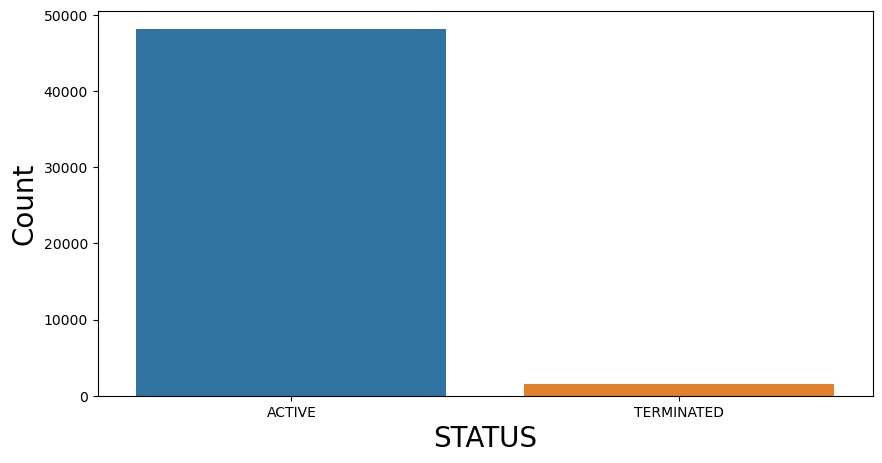

In [60]:
#barplot for status for categorical variables
status_label = df.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(status_label.index, status_label);
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

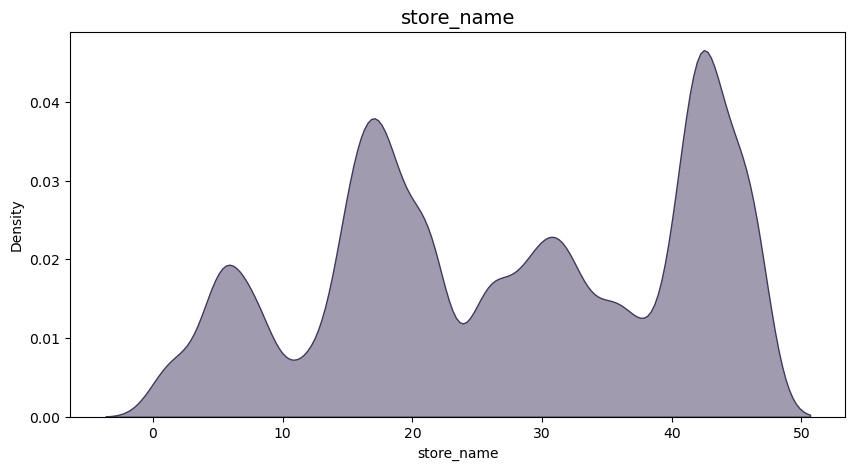

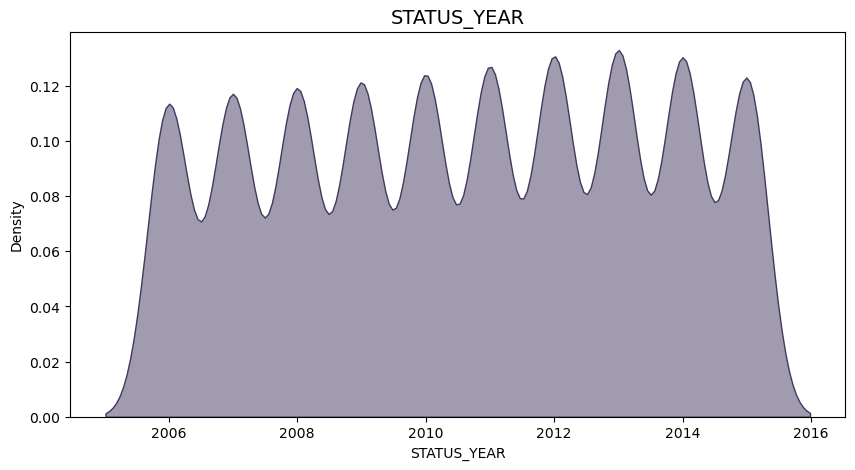

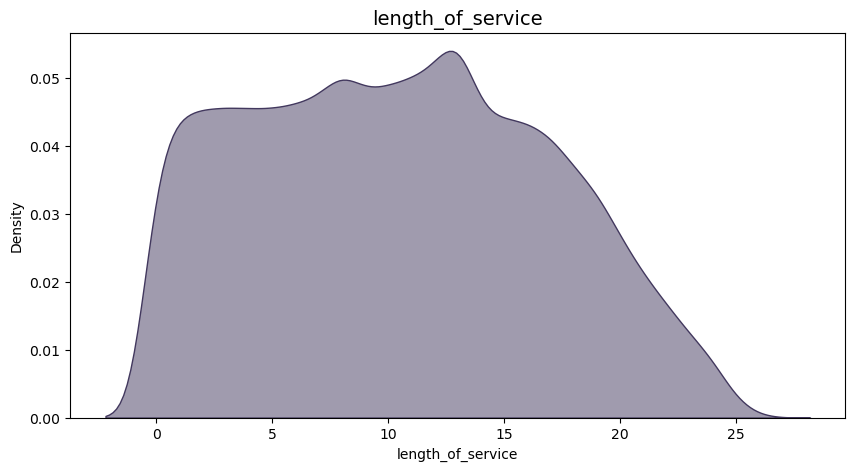

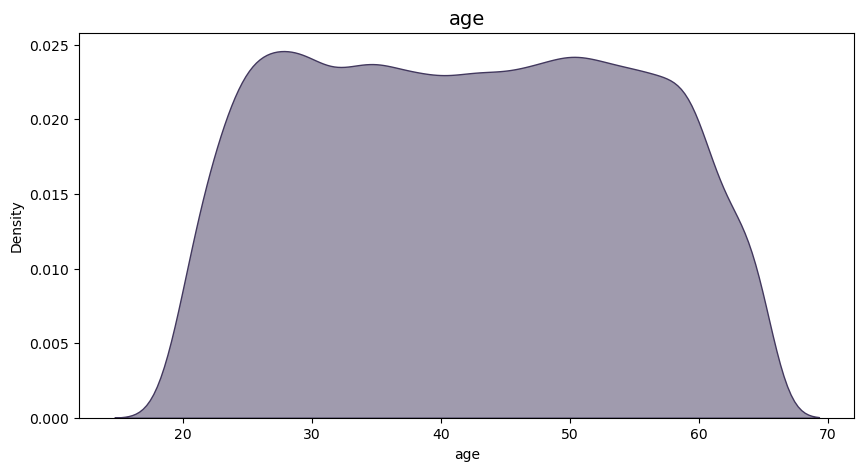

In [61]:
#kde plot for numerical variables
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column], color = '#42385E', shade = True, label = 'terminated', alpha = 0.5)
    plt.title(column, size = 14)

In [75]:
#preprocessing of dataset 

city_name_label = {value: key for key, value in enumerate(df['city_name'].unique())}
df['city_name'] = df['city_name'].map(city_name_label)

department_name_label = {value: key for key, value in enumerate(df['department_name'].unique())}
df['department_name'] = df['department_name'].map(department_name_label)

job_title_label = {value: key for key, value in enumerate(df['job_title'].unique())}
df['job_title'] = df['job_title'].map(job_title_label)

gender_short_label = {value: key for key, value in enumerate(df['gender_short'].unique())}
df['gender_short'] = df['gender_short'].map(gender_short_label)

term_desc_label = {value: key for key, value in enumerate(df['termreason_desc'].unique())}
df['termreason_desc'] = df['termreason_desc'].map(term_desc_label)

termtype_desc_label = {value: key for key, value in enumerate(df['termtype_desc'].unique())}
df['termtype_desc'] = df['termtype_desc'].map(termtype_desc_label)

status_label = {value: key for key, value in enumerate(df['STATUS'].unique())}
df['STATUS'] = df['STATUS'].map(status_label)

business_label = {value: key for key, value in enumerate(df['BUSINESS_UNIT'].unique())}
df['BUSINESS_UNIT'] = df['BUSINESS_UNIT'].map(business_label)

In [102]:
#one hot encoding
df1 = df

In [103]:
#one hot encode the two columns
one_hot = pd.get_dummies(df1, columns=['department_name', 'STATUS_YEAR'])

df2 = one_hot

In [104]:
df2.head()

,orighiredate_key,terminationdate_key,age,length_of_service,city_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT,department_name_0,department_name_1,department_name_2,department_name_3,department_name_4,department_name_5,department_name_6,department_name_7,department_name_8,department_name_9,department_name_10,department_name_11,department_name_12,department_name_13,department_name_14,department_name_15,department_name_16,department_name_17,department_name_18,department_name_19,department_name_20,STATUS_YEAR_2006,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015
0,8/28/1989,1/1/1900,52,17,0,0,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,8/28/1989,1/1/1900,53,18,0,0,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8/28/1989,1/1/1900,54,19,0,0,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,8/28/1989,1/1/1900,55,20,0,0,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8/28/1989,1/1/1900,56,21,0,0,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


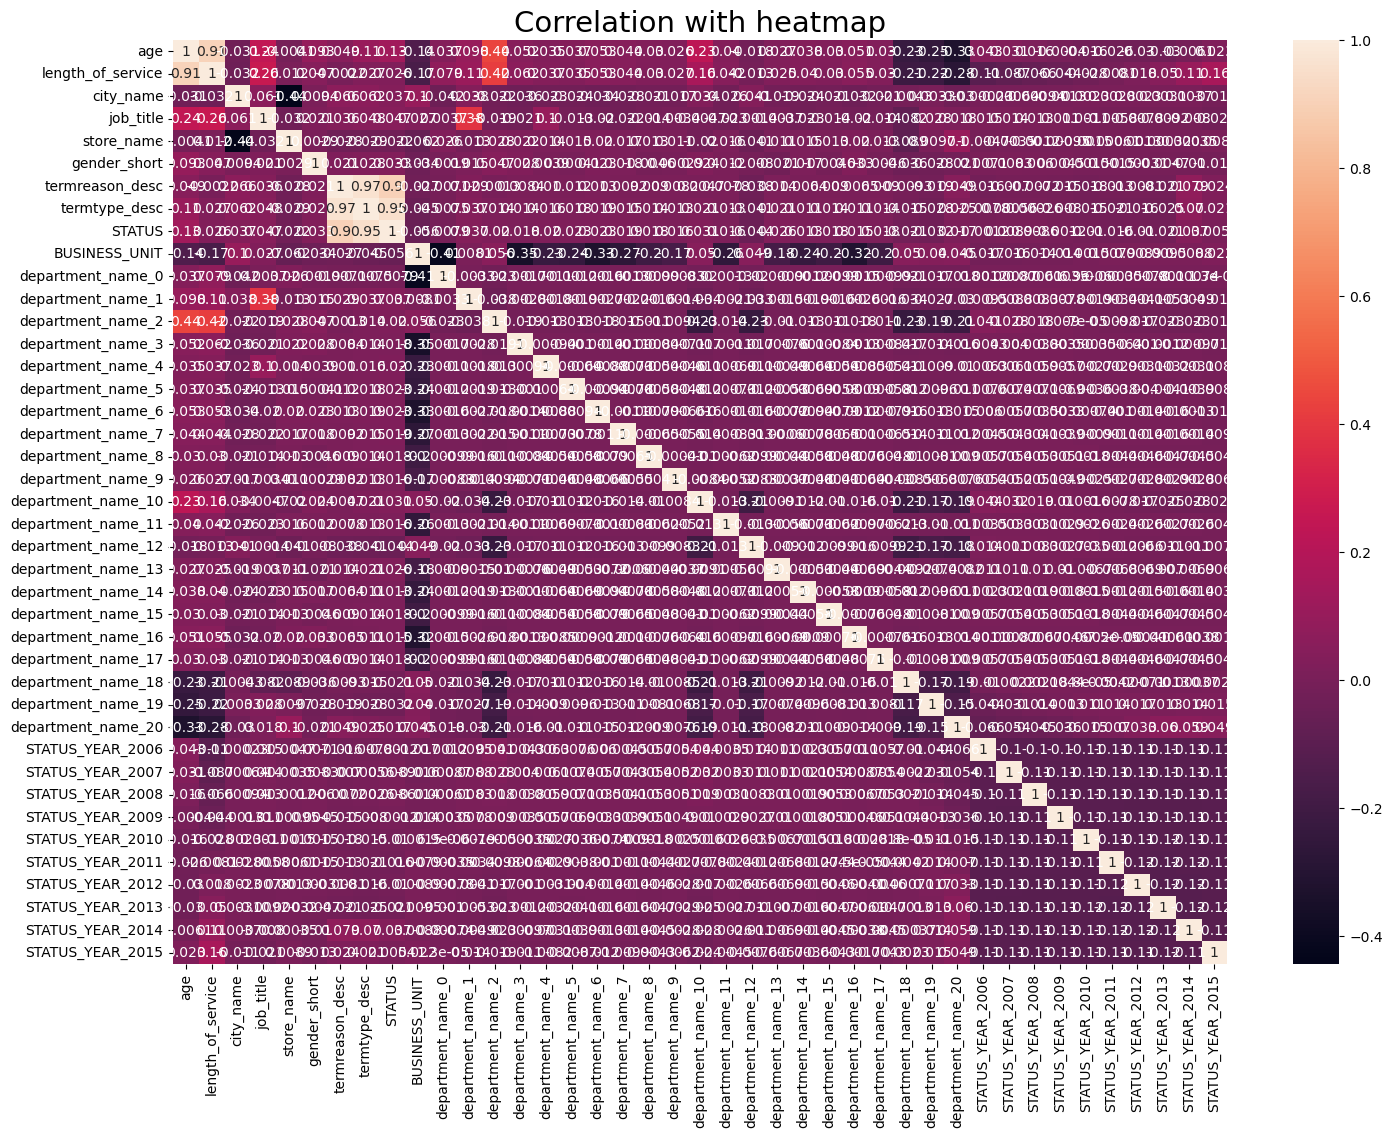

In [105]:
#correlation
plt.figure(figsize=(17, 12))
sns.heatmap(df2.corr(), annot=True);
plt.title('Correlation with heatmap', fontsize=21);

In [106]:
#checking correlation of STATUS w.r.t other features
df2.corr()['STATUS'].sort_values(ascending=False)[1:]

termtype_desc         0.954594
termreason_desc       0.901363
age                   0.132552
job_title             0.047283
STATUS_YEAR_2014      0.037421
city_name             0.037106
department_name_1     0.036743
gender_short          0.033245
department_name_10    0.030847
department_name_13    0.025938
length_of_service     0.025808
department_name_6     0.023352
department_name_5     0.022524
department_name_2     0.020400
department_name_4     0.019741
department_name_7     0.018613
department_name_3     0.018167
department_name_8     0.017656
department_name_15    0.017656
department_name_17    0.017656
department_name_20    0.016528
department_name_11    0.016180
department_name_9     0.015924
department_name_16    0.014537
department_name_14    0.013484
STATUS_YEAR_2007      0.008877
STATUS_YEAR_2008      0.008601
STATUS_YEAR_2015      0.005373
STATUS_YEAR_2006     -0.001204
STATUS_YEAR_2009     -0.001239
department_name_0    -0.007888
STATUS_YEAR_2010     -0.010025
STATUS_Y

In [107]:
#dropping some columns
df2.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key'], axis=1, inplace=True)

In [108]:
df2.head()

,age,length_of_service,city_name,job_title,store_name,gender_short,STATUS,BUSINESS_UNIT,department_name_0,department_name_1,department_name_2,department_name_3,department_name_4,department_name_5,department_name_6,department_name_7,department_name_8,department_name_9,department_name_10,department_name_11,department_name_12,department_name_13,department_name_14,department_name_15,department_name_16,department_name_17,department_name_18,department_name_19,department_name_20,STATUS_YEAR_2006,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015
0,52,17,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,53,18,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,54,19,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,55,20,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,56,21,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [109]:
#train,test,split
def result(X, y, ts, rs, model):
    
#train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
#scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
#fit on data
    model.fit(X_train, y_train)
    
#prediction
    pred = model.predict(X_test)
    
#performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [110]:
#independent and dependent features
X = df2[['age', 'length_of_service', 'city_name','job_title', 'store_name', 'gender_short', 'BUSINESS_UNIT']]
y = df2[['STATUS']]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     12034
           1       0.00      0.00      0.00       380

    accuracy                           0.97     12414
   macro avg       0.48      0.50      0.49     12414
weighted avg       0.94      0.97      0.95     12414

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9693893990655711
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


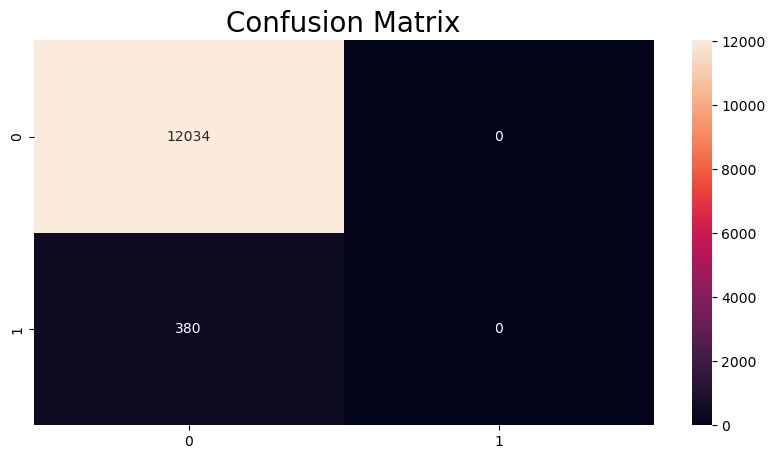

In [111]:
#machine learning algo

#logistic regression
model = LogisticRegression()
result(X, y, 0.25, 0, model)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12058
           1       0.86      0.64      0.73       356

    accuracy                           0.99     12414
   macro avg       0.92      0.82      0.86     12414
weighted avg       0.99      0.99      0.99     12414

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9866280006444337
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


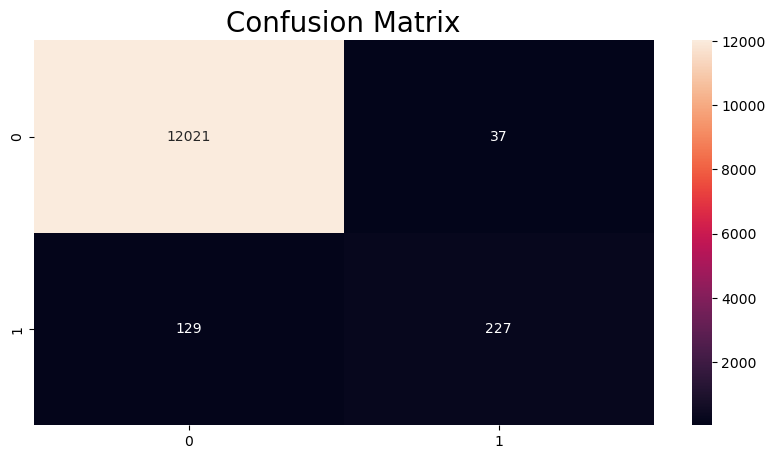

In [112]:
#randomforest classifier
rf = RandomForestClassifier()
result(X, y, 0.25, 42, rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14458
           1       0.89      0.48      0.63       438

    accuracy                           0.98     14896
   macro avg       0.94      0.74      0.81     14896
weighted avg       0.98      0.98      0.98     14896

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.983015574650913
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


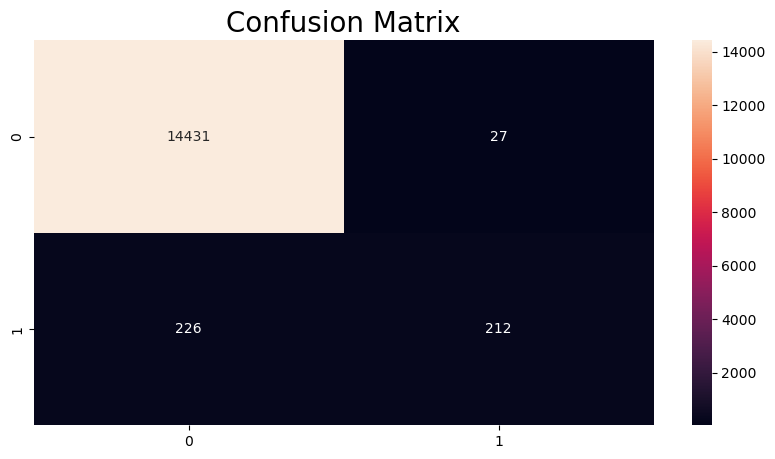

In [113]:
#KNN algo
knn = KNeighborsClassifier()
result(X, y, 0.3, 25, knn)

In [114]:
#label encoding - create a label encoder
le = LabelEncoder()

label_encoder = preprocessing.LabelEncoder()

df['city_name']=label_encoder.fit_transform(df['city_name'])
df['job_title']=label_encoder.fit_transform(df['job_title'])
df['gender_short']=label_encoder.fit_transform(df['gender_short'])
df['STATUS']=label_encoder.fit_transform(df['STATUS'])
df['BUSINESS_UNIT']=label_encoder.fit_transform(df['BUSINESS_UNIT'])

In [116]:
df2.head()

,age,length_of_service,city_name,job_title,store_name,gender_short,STATUS,BUSINESS_UNIT,department_name_0,department_name_1,department_name_2,department_name_3,department_name_4,department_name_5,department_name_6,department_name_7,department_name_8,department_name_9,department_name_10,department_name_11,department_name_12,department_name_13,department_name_14,department_name_15,department_name_16,department_name_17,department_name_18,department_name_19,department_name_20,STATUS_YEAR_2006,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015
0,52,17,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,53,18,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,54,19,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,55,20,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,56,21,0,0,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [117]:
#lazypredict
! pip install lazypredict


     ---------------------------------------- 1.0/1.0 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 89.1/89.1 MB 591.4 kB/s eta 0:00:00


In [118]:
import lazypredict